# Unit 5 - Financial Planning

In [80]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [81]:
# Load .env enviroment variables
load_dotenv() #true .env file is loaded

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [82]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [83]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [84]:
# api for btc loaded succesfully. Response = 200
btc_response = requests.get(btc_url)
btc_response


<Response [200]>

In [85]:
# api for eth loaded succesfully. Response = 200
eth_response = requests.get(eth_url)
eth_response

<Response [200]>

In [86]:
# Loaded btc_data in json and formattted it using indent = 4

btc_data = btc_response.json()
print(json.dumps( btc_data, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 19405256,
            "total_supply": 19405256,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 26530.0,
                    "volume_24h": 4486605030,
                    "market_cap": 514870625240,
                    "percentage_change_1h": 0.216254548115015,
                    "percentage_change_24h": 1.14690783717324,
                    "percentage_change_7d": 3.03789005199099,
                    "percent_change_1h": 0.216254548115015,
                    "percent_change_24h": 1.14690783717324,
                    "percent_change_7d": 3.03789005199099
                },
                "CAD": {
                    "price": 36041.005,
                    "volume_24h": 6095052933.255,
                    "market

In [87]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["CAD"]["price"] # retrieved BTC CAD price from the nested dictionary 
btc_price

36041.005

In [88]:
# Loaded eth_data in json and formattted it using indent = 4
eth_data = eth_response.json()
print(json.dumps( eth_data, indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 120212803,
            "total_supply": 120212803,
            "max_supply": 120212803,
            "quotes": {
                "USD": {
                    "price": 1728.2,
                    "volume_24h": 5139078821,
                    "market_cap": 207725289639,
                    "percentage_change_1h": 0.181093088270161,
                    "percentage_change_24h": 0.661947301310129,
                    "percentage_change_7d": -1.31579501219584,
                    "percent_change_1h": 0.181093088270161,
                    "percent_change_24h": 0.661947301310129,
                    "percent_change_7d": -1.31579501219584
                },
                "CAD": {
                    "price": 2347.7597,
                    "volume_24h": 6981438578.3285,
            

In [89]:
# Fetch current ETH price
eth_price = eth_data["data"]["1027"]["quotes"]["CAD"]["price"] # retrieved ETH CAD price from the nested dictionary 
eth_price


2347.7597

In [90]:
# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $43249.21
The current value of your 5.3 ETH is $12443.13


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [91]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [92]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("alpaca_api_key")
alpaca_secret_key = os.getenv("alpaca_secret_key")

 # Verifying that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [93]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [94]:
# Format current date as ISO format
current_date = pd.Timestamp("2023-06-13", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"



In [95]:
# Get current closing prices for SPY and AGG
portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df

portfolio



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2023-06-13 04:00:00+00:00,98.48,98.48,97.6001,97.68,9568596,27973,97.819261,AGG
2023-06-13 04:00:00+00:00,435.32,437.33,434.6300,436.66,95912772,673273,436.003879,SPY


In [96]:
# Reorganize the DataFrame

# Separate ticker data
agg = portfolio[portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy = portfolio[portfolio['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
multi_index_portfolio = pd.concat([agg,spy],axis=1, keys=["AGG","SPY"])

# Preview DataFrame
multi_index_portfolio.head()


AGG                                              \
                            open   high      low  close   volume trade_count   
timestamp                                                                      
2023-06-13 04:00:00+00:00  98.48  98.48  97.6001  97.68  9568596       27973   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2023-06-13 04:00:00+00:00  97.819261  435.32  437.33  434.63  436.66   

                                                             
                             volume trade_count        vwap  
timestamp                                                    
2023-06-13 04:00:00+00:00  95912772      673273  436.003879

In [97]:
# Pick AGG and SPY close prices
agg_close_price = float(multi_index_portfolio["AGG"]["close"])
spy_close_price = float(multi_index_portfolio["SPY"]["close"])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")




Current AGG closing price: $97.68
Current SPY closing price: $436.66


In [98]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21833.00
The current value of your 200 AGG shares is $19536.00


### Savings Health Analysis

In [99]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = my_agg_value + my_spy_value

# Create savings DataFrame
df_savings =  pd.DataFrame({"amount": [crypto_value, shares_value]},
                          index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,55692.33241
shares,41369.00000


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='amount'>

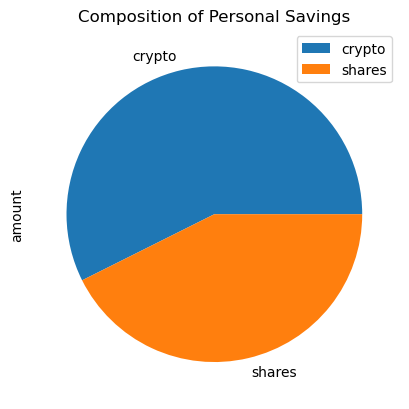

In [100]:
# Plot savings pie chart
df_savings.plot(kind="pie", y="amount",title="Composition of Personal Savings")

In [101]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto_value + shares_value
total_savings = round(total_savings,2)
total_savings

97061.33

In [102]:
# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have more than sufficient amount of money as savings in case of an emergency.")
elif total_savings == emergency_fund:
    print("Congratulations! You have exactly the amount required for emergencies in your savings.")
else:
    difference = emergency_fund - total_savings
    difference = round(difference,2)
    print(f"You are ${difference} away from attaining financial security.")



Congratulations! You have more than sufficient amount of money as savings in case of an emergency.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [103]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-17', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-17', tz='America/New_York').isoformat()

In [104]:
# Get 5 years' worth of historical data for SPY and AGG
sim_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

sim_portfolio.head(5)



,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2018-06-18 04:00:00+00:00,105.93,105.9300,105.80,105.900,2359452,10590,105.864382,AGG
2018-06-19 04:00:00+00:00,106.05,106.1100,105.98,106.010,2184239,10342,106.041881,AGG
2018-06-20 04:00:00+00:00,106.06,106.0600,105.79,105.805,2403650,9220,105.886127,AGG
2018-06-21 04:00:00+00:00,105.88,105.9599,105.81,105.840,2896731,11286,105.870603,AGG
2018-06-22 04:00:00+00:00,105.82,105.9400,105.80,105.940,1957177,7830,105.897826,AGG


In [105]:
# Reorganize the DataFrame
# Separate ticker data

agg = sim_portfolio[sim_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy = sim_portfolio[sim_portfolio['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_stock_data =  pd.concat([agg,spy],axis=1, keys=["AGG","SPY"])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-06-18 04:00:00+00:00       10590  105.864382  275.49  276.700  274.95   
2018-06-19 04:00:00+00:00       10342  106.041881  274.00  275.750  273.53   
2018-06-20 04:00:00+00:00        9220  105.886127  276.26  276.720  275.59   
2018-06-21 04:00:00+00:00       11286  105.870603  275.96  275.980  273.68   
2018-06-22 04:00:00+00:00        7830  105.897826  275.66  275.785  274.49   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00  276.59  53163695      221103  276.151288  
2018-06-19 04:00:00+00:00  275.48  97669710      337433  274.931757  
2018-06-20 04:00:00+00:00  276.01  54051558      212283  276.065730  
2018-06-21 04:00:00+00:00  274.24  75659252      289344  274.618337  
2018-06-22 04:00:00+00:00  274.76  58532014      231536  275.099940

In [106]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [107]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head() 

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2018-06-18 04:00:00+00:00       10590  105.864382          NaN  275.49   
2018-06-19 04:00:00+00:00       10342  106.041881     0.001039  274.00   
2018-06-20 04:00:00+00:00        9220  105.886127    -0.001934  276.26   
2018-06-21 04:00:00+00:00       11286  105.870603     0.000331  275.96   
2018-06-22 04:00:00+00:00        7830  105.897826     0.000945  275.66   

                                                                          \
                              high     low   close    volume trade_count   
timestamp                                                                  
2018-06-18 04:00:00+00:00  276.700  274.95  276.59  53163695      221103   
2018-06-19 04:00:00+00:00  275.750  273.53  275.48  97669710      337433   
2018-06-20 04:00:00+00:00  276.720  275.59  276.01  54051558      212283   
2018-06-21 04:00:00+00:00  275.980  273.68  274.24  75659252      289344   
2018-06-22 04:00:00+00:00  275.785  274.49  274.76  58532014      231536   

                                                    
                                 vwap daily_return  
timestamp                                           
2018-06-18 04:00:00+00:00  276.151288          NaN  
2018-06-19 04:00:00+00:00  274.931757    -0.004013  
2018-06-20 04:00:00+00:00  276.065730     0.001924  
2018-06-21 04:00:00+00:00  274.618337    -0.006413  
2018-06-22 04:00:00+00:00  275.099940     0.001896

In [108]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009682,1.004951,0.997531,0.997078,1.004214,1.003857,1.012641,0.996821,1.000323,1.002331,...,1.009853,1.003010,0.978779,1.007232,1.001051,0.997820,0.998994,1.007162,0.999431,1.000146
2,1.000602,1.022964,0.995104,0.994866,1.002867,1.010228,1.012772,0.989942,0.996937,0.994370,...,1.006766,1.007060,0.981264,1.021131,1.001908,0.993854,0.997617,1.003826,0.997816,1.004392
3,1.004940,1.022416,0.995585,0.998897,0.999008,1.016524,1.007641,0.986768,0.991349,0.997607,...,1.022491,1.012382,0.984421,1.004881,0.993059,0.991465,0.994207,1.003965,0.994155,1.017637
4,1.010776,1.021816,1.000963,1.012261,1.001011,1.012990,0.998958,0.975589,0.987069,0.992527,...,1.016797,1.012846,0.981345,1.009699,1.000687,0.995905,0.988013,1.007504,0.994836,1.019873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.528064,5.788466,2.304957,8.938375,10.709418,3.884223,5.681246,1.380016,3.392458,13.230517,...,2.532015,12.302050,2.542592,12.609025,10.677899,12.775848,9.359126,5.778996,10.789947,5.132015
7557,8.518221,5.810306,2.317907,8.826242,10.809855,3.881376,5.676335,1.384102,3.387142,13.249876,...,2.561168,12.432807,2.565458,12.578974,10.715285,12.850127,9.232452,5.800510,10.672306,5.138678
7558,8.584037,5.799633,2.328705,8.871952,10.838409,3.861256,5.623263,1.395879,3.412205,13.207453,...,2.502325,12.274105,2.611462,12.759650,10.791932,12.939299,9.024270,5.845469,10.667488,5.197667
7559,8.629605,5.734032,2.321783,8.780111,10.774712,3.849466,5.573795,1.399518,3.408105,12.968073,...,2.475214,12.289030,2.608118,12.786203,10.871201,12.748928,8.999375,5.867935,10.482587,5.278543


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

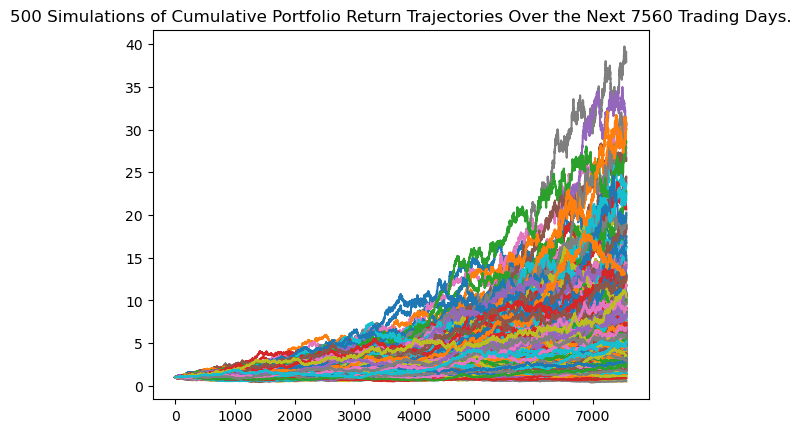

In [109]:
# Plot simulation outcomes
MC_thirtyyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

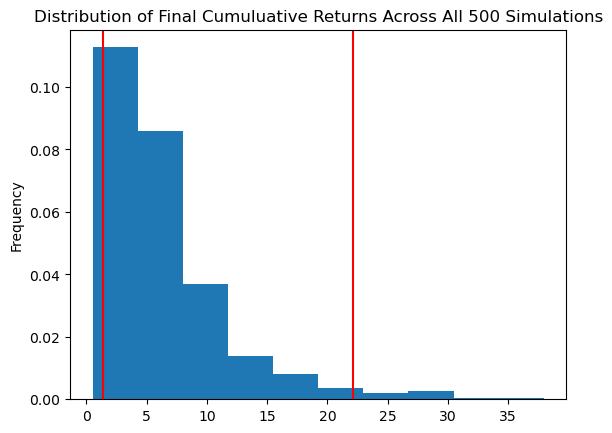

In [110]:
# Plot probability distribution and confidence intervals
MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [111]:
# Fetch summary statistics from the Monte Carlo simulation results
thirty_year_summary = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(thirty_year_summary)

count           500.000000
mean              6.499266
std               5.266256
min               0.527231
25%               3.093555
50%               4.821596
75%               8.097212
max              37.960051
95% CI Lower      1.374314
95% CI Upper     22.156668
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [112]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(thirty_year_summary[8] * initial_investment, 2)
ci_upper = round(thirty_year_summary[9] * initial_investment, 2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $27486.28 and $443133.37


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [113]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(thirty_year_summary[8] * initial_investment, 2)
ci_upper = round(thirty_year_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $41229.42 and $664700.05


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [114]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [115]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008991,1.002449,0.998541,1.008679,0.990134,1.008178,1.013526,0.999083,1.011980,0.993140,...,1.010762,1.009919,1.009308,1.002748,1.008638,0.991965,0.991543,0.996822,0.993402,1.000572
2,1.012832,1.004488,0.997252,1.010465,0.992581,1.000327,1.014646,1.001512,0.999323,0.991804,...,1.010659,1.006485,1.004213,1.011354,1.001711,0.995308,0.999741,0.995353,0.983534,0.986025
3,1.011238,1.018686,1.005722,1.010918,0.999365,1.005661,1.025408,0.996581,1.008363,0.997450,...,1.028522,1.005199,1.006330,1.019320,1.000181,1.009147,0.993498,0.992988,0.983476,0.980004
4,1.009919,1.030419,1.017619,1.019532,0.999506,1.005156,1.022453,0.982841,0.999076,1.000081,...,1.014553,1.003657,1.002054,1.038745,0.993229,1.017363,1.003904,0.992310,0.980628,0.966629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.232033,0.966704,1.004801,1.085647,2.367616,1.797320,2.089905,1.637534,0.694867,1.333721,...,1.383059,1.478806,1.733566,1.591094,1.186230,0.786942,1.073418,1.506847,0.943593,1.378477
1257,1.232293,0.970880,0.989280,1.089612,2.367493,1.789768,2.081463,1.629372,0.697714,1.345080,...,1.390196,1.466996,1.737847,1.579039,1.187027,0.792053,1.092671,1.530151,0.943539,1.385678
1258,1.228585,0.975760,0.991965,1.090687,2.337809,1.800878,2.087689,1.621920,0.683265,1.349855,...,1.382298,1.451802,1.728248,1.572436,1.184330,0.796396,1.091420,1.537801,0.932334,1.392823
1259,1.238163,0.969145,1.002062,1.086739,2.349577,1.786651,2.044509,1.609307,0.689738,1.349819,...,1.391372,1.440862,1.720931,1.560534,1.195252,0.793517,1.096311,1.547965,0.943649,1.383917


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

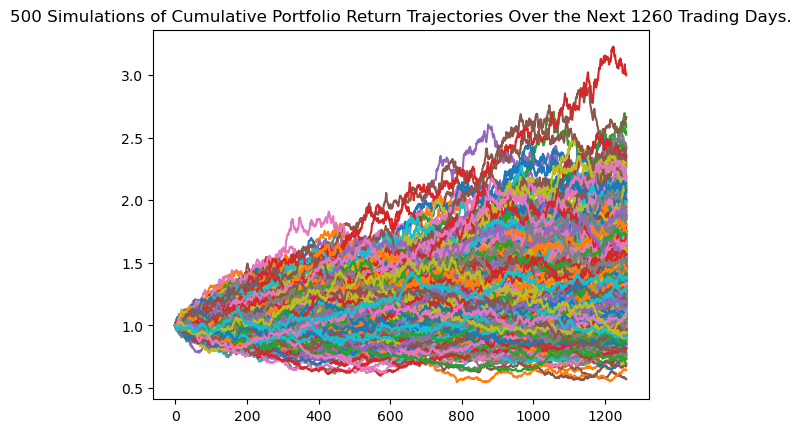

In [116]:
# Plot simulation outcomes
MC_fiveyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

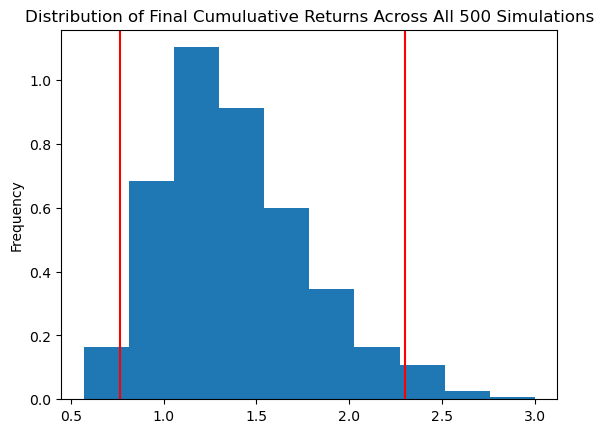

In [117]:
# Plot probability distribution and confidence intervals
MC_fiveyear.plot_distribution()

In [118]:
# Fetch summary statistics from the Monte Carlo simulation results
five_year_summary = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(five_year_summary)

count           500.000000
mean              1.391902
std               0.394761
min               0.571062
25%               1.097710
50%               1.348203
75%               1.621734
max               2.999594
95% CI Lower      0.767026
95% CI Upper      2.298462
Name: 1260, dtype: float64


In [119]:
# Set initial investment
initial_investment = 35000 #larger investment and same ratio

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(five_year_summary[8] * initial_investment, 2)
ci_upper_five = round(five_year_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 5 years will end within in the range of $26845.91 and $80446.17


### Ten Years Retirement Option

In [120]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [121]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006863,0.998003,1.010880,1.001042,0.996496,0.996078,0.999960,1.010472,1.005194,0.983378,...,0.995886,1.000132,1.002039,0.983277,1.005463,1.003560,1.001408,1.006960,0.989592,0.983471
2,1.007145,0.977299,1.011190,0.999047,1.001372,0.989793,0.984750,1.007074,1.004065,0.968007,...,0.985836,1.008509,1.015893,0.983551,1.021495,1.014370,0.985635,1.015448,0.994897,0.979829
3,1.006499,0.978545,1.013024,0.999990,1.001680,0.999443,0.984899,1.009683,0.989081,0.977293,...,0.987455,1.003350,1.013563,0.978484,1.018900,1.016765,0.992338,1.024691,0.987067,0.973342
4,1.004086,0.987936,1.022287,0.987706,0.994003,0.997462,0.995333,0.996346,0.983552,0.985665,...,0.998096,0.994395,1.026204,0.977146,1.027255,1.029243,0.987547,1.030377,0.968061,0.965957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.810133,1.342341,1.813902,2.956637,4.283224,2.272865,1.695445,3.217945,1.414715,0.782607,...,0.767819,0.571087,2.616546,0.845006,2.790633,1.285861,0.911393,1.488322,1.507253,2.388245
2517,1.815422,1.366981,1.815900,2.955425,4.327688,2.305051,1.716507,3.236776,1.423801,0.777305,...,0.768975,0.568672,2.627980,0.845883,2.756744,1.281467,0.909231,1.501641,1.506337,2.402181
2518,1.823230,1.363619,1.807377,2.943618,4.284687,2.297275,1.722493,3.282311,1.412935,0.779512,...,0.781817,0.575454,2.619082,0.847996,2.757577,1.277796,0.905925,1.514310,1.491449,2.404542
2519,1.845469,1.378722,1.803103,2.925560,4.292140,2.291945,1.734569,3.257259,1.413726,0.780241,...,0.784484,0.580089,2.620606,0.851684,2.750371,1.262760,0.914728,1.510694,1.505155,2.402625


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

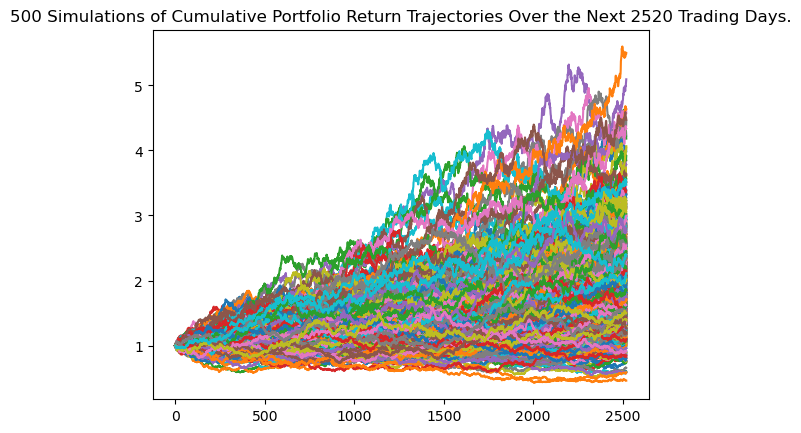

In [122]:
# Plot simulation outcomes
MC_tenyear.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

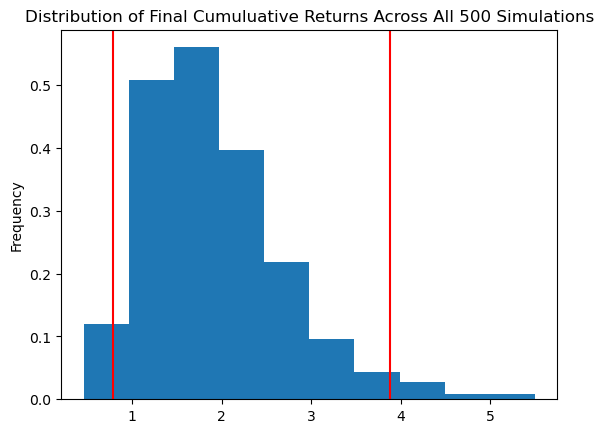

In [123]:
# Plot probability distribution and confidence intervals
MC_tenyear.plot_distribution()

In [124]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_year_summary = MC_tenyear.summarize_cumulative_return()

# Print summary statistics
print(ten_year_summary)

count           500.000000
mean              1.918143
std               0.779719
min               0.460993
25%               1.355311
50%               1.782167
75%               2.329054
max               5.497484
95% CI Lower      0.784059
95% CI Upper      3.883067
Name: 2520, dtype: float64


In [125]:
# Set initial investment
initial_investment = 35000 #larger investment and same ratio

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_year_summary[8] * initial_investment, 2)
ci_upper_ten = round(ten_year_summary[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $35000 in the portfolio over the next 10 years will end within in the range of $27442.08 and $135907.33
